In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [29]:
cancer = pd.read_csv("data/99-16_국립암센터_년도별 국가암등록통계.csv", encoding='euc-kr')
cancer_sur = pd.read_csv("data/93-16_국립암센터_24개종 암상대생존율.csv", encoding='euc-kr')
insur = pd.read_csv("data/13-17_건심평_3단상병별 성별 연령별 통계.csv", encoding='euc-kr')
insur_cancer = pd.read_csv("data/13-17_건심평_암 상병 통계.csv", encoding='euc-kr')
CPI = pd.read_excel("data/CPI.xlsx")

In [4]:
CPI

,날짜,[대한민국]소비자물가 총지수
0,2019-12-31,104.682857
1,2018-12-31,104.453333
2,2017-12-31,102.934167
3,2016-12-31,100.970833
4,2015-12-31,99.999167
5,2014-12-31,99.297917
6,2013-12-31,98.048083
7,2012-12-31,96.788500
8,2011-12-31,94.716833
9,2010-12-31,91.051250


In [5]:
insur.head()

,진료년도,주상병코드,성별,연령구간,환자수(명),청구건수(건),요양급여비용(원),연결test
0,2013,A00,남,0_4세,6,6,79730.0,2013남A000-4세
1,2013,A00,남,5_9세,2,2,27470.0,2013남A005-9세
2,2013,A00,남,10_14세,3,4,57590.0,2013남A0010-14세
3,2013,A00,남,20_24세,1,1,177710.0,2013남A0020-24세
4,2013,A00,남,25_29세,1,1,26420.0,2013남A0025-29세


In [6]:
insur_cancer.head()

,진료년도,암상병코드,환자수(명),청구건수(건),요양급여비용(원)
0,2013,C00,324,1562,461272590
1,2013,C01,679,6322,2617671820
2,2013,C02,2561,26425,10823034250
3,2013,C03,663,5818,2245432280
4,2013,C04,391,3360,1351679880


In [7]:
cancer.head()

,발생연도,성,국제질병분류코드,암종,연령군,발생자수(명),발생률(명/10만명),연결test
0,1999,남녀전체,C00-C96,모든암,00-04세,534.0,16.0,1999남C00-C9600-04세
1,1999,남녀전체,C00-C96,모든암,05-09세,297.0,8.6,1999남C00-C9605-09세
2,1999,남녀전체,C00-C96,모든암,10-14세,304.0,9.6,1999남C00-C9610-14세
3,1999,남녀전체,C00-C96,모든암,15-19세,510.0,12.7,1999남C00-C9615-19세
4,1999,남녀전체,C00-C96,모든암,20-24세,705.0,18.0,1999남C00-C9620-24세


In [8]:
cancer_sur.head()

,발생기간,성,국제질병분류코드(ICD-10),암종,환자수(명),5년 암상대생존율(%)
0,1993-1995년,남녀전체,C00-C96,모든암,"169,365",41.2
1,1993-1995년,남녀전체,C00-C14,"입술, 구강 및 인두","3,400",41.1
2,1993-1995년,남녀전체,C15,식도,"3,412",12.7
3,1993-1995년,남녀전체,C16,위,"38,593",42.8
4,1993-1995년,남녀전체,C18-C20,대장,"13,467",54.8


In [9]:
can = cancer.set_index('발생연도')
can.head()

,성,국제질병분류코드,암종,연령군,발생자수(명),발생률(명/10만명),연결test
발생연도,,,,,,,
1999,남녀전체,C00-C96,모든암,00-04세,534.0,16.0,1999남C00-C9600-04세
1999,남녀전체,C00-C96,모든암,05-09세,297.0,8.6,1999남C00-C9605-09세
1999,남녀전체,C00-C96,모든암,10-14세,304.0,9.6,1999남C00-C9610-14세
1999,남녀전체,C00-C96,모든암,15-19세,510.0,12.7,1999남C00-C9615-19세
1999,남녀전체,C00-C96,모든암,20-24세,705.0,18.0,1999남C00-C9620-24세


성
남녀전체    AxesSubplot(0.125,0.125;0.775x0.755)
남자      AxesSubplot(0.125,0.125;0.775x0.755)
여자      AxesSubplot(0.125,0.125;0.775x0.755)
Name: 발생률(명/10만명), dtype: object

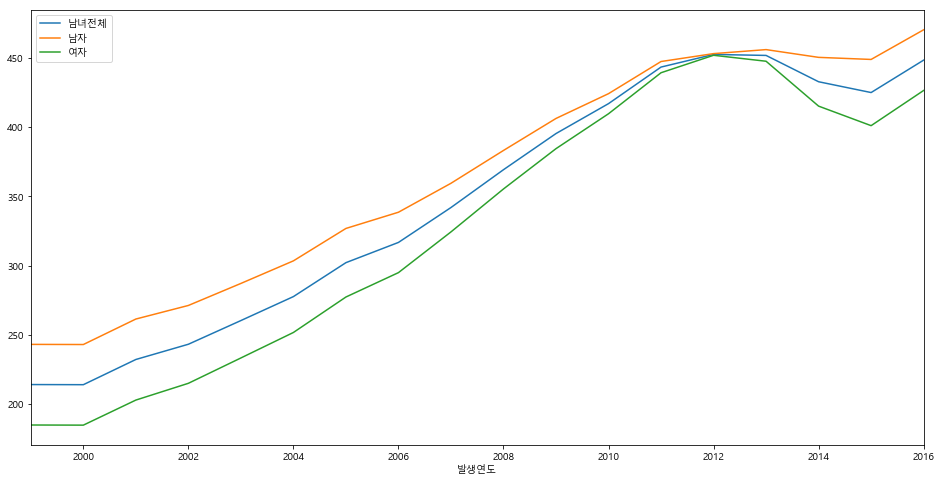

In [10]:
can.query('연령군 =="전체" and 암종=="모든암"').groupby('성')['발생률(명/10만명)'].plot(figsize=(16,8),legend=1)

암종
간              AxesSubplot(0.125,0.125;0.775x0.755)
갑상선            AxesSubplot(0.125,0.125;0.775x0.755)
고환             AxesSubplot(0.125,0.125;0.775x0.755)
기타 암           AxesSubplot(0.125,0.125;0.775x0.755)
난소             AxesSubplot(0.125,0.125;0.775x0.755)
뇌 및 중추신경계      AxesSubplot(0.125,0.125;0.775x0.755)
다발성 골수종        AxesSubplot(0.125,0.125;0.775x0.755)
담낭 및 기타담도      AxesSubplot(0.125,0.125;0.775x0.755)
대장             AxesSubplot(0.125,0.125;0.775x0.755)
방광             AxesSubplot(0.125,0.125;0.775x0.755)
백혈병            AxesSubplot(0.125,0.125;0.775x0.755)
비호지킨 림프종       AxesSubplot(0.125,0.125;0.775x0.755)
식도             AxesSubplot(0.125,0.125;0.775x0.755)
신장             AxesSubplot(0.125,0.125;0.775x0.755)
위              AxesSubplot(0.125,0.125;0.775x0.755)
유방             AxesSubplot(0.125,0.125;0.775x0.755)
입술, 구강 및 인두    AxesSubplot(0.125,0.125;0.775x0.755)
자궁경부           AxesSubplot(0.125,0.125;0.775x0.755)
자궁체부           AxesSubplot(0.125,0.125;0.775x0.755)
전립선      

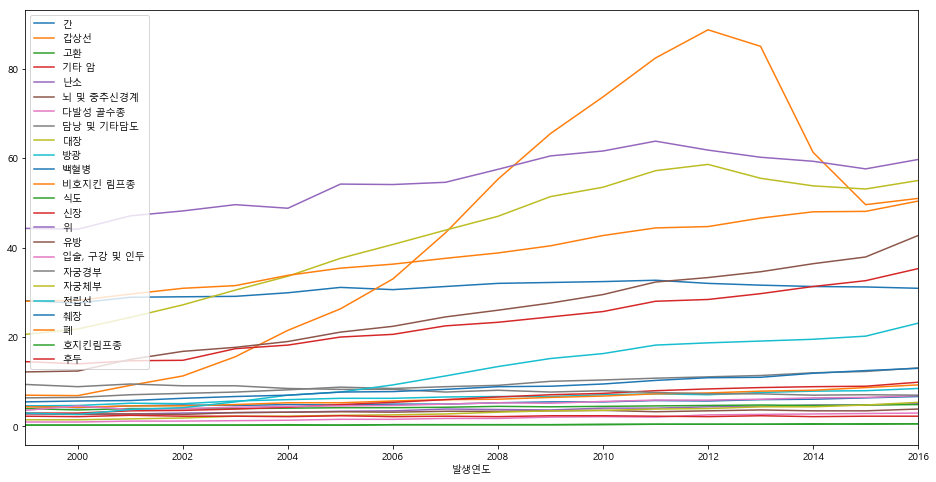

In [11]:
can.query('연령군 =="전체" and 성=="남녀전체" and 암종!="모든암"').groupby('암종')['발생률(명/10만명)'].plot(figsize=(16,8),legend=1)

발생연도
1999    AxesSubplot(0.125,0.125;0.775x0.755)
2000    AxesSubplot(0.125,0.125;0.775x0.755)
2001    AxesSubplot(0.125,0.125;0.775x0.755)
2002    AxesSubplot(0.125,0.125;0.775x0.755)
2003    AxesSubplot(0.125,0.125;0.775x0.755)
2004    AxesSubplot(0.125,0.125;0.775x0.755)
2005    AxesSubplot(0.125,0.125;0.775x0.755)
2006    AxesSubplot(0.125,0.125;0.775x0.755)
2007    AxesSubplot(0.125,0.125;0.775x0.755)
2008    AxesSubplot(0.125,0.125;0.775x0.755)
2009    AxesSubplot(0.125,0.125;0.775x0.755)
2010    AxesSubplot(0.125,0.125;0.775x0.755)
2011    AxesSubplot(0.125,0.125;0.775x0.755)
2012    AxesSubplot(0.125,0.125;0.775x0.755)
2013    AxesSubplot(0.125,0.125;0.775x0.755)
2014    AxesSubplot(0.125,0.125;0.775x0.755)
2015    AxesSubplot(0.125,0.125;0.775x0.755)
2016    AxesSubplot(0.125,0.125;0.775x0.755)
Name: 발생률(명/10만명), dtype: object

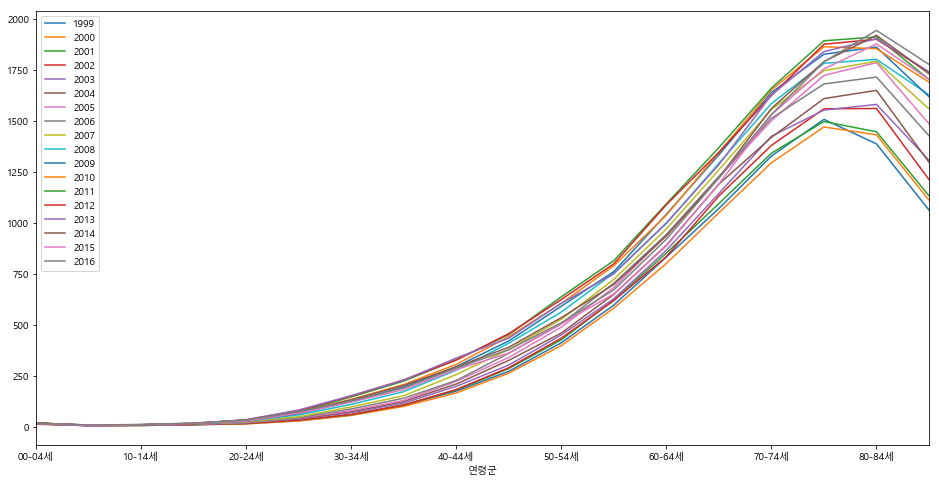

In [12]:
cancer.set_index('연령군').query('암종=="모든암" and 연령군!="전체" and 성=="남녀전체"').sort_values('연령군').groupby('발생연도')['발생률(명/10만명)'].plot(figsize=(16,8),legend=1)

발생연도
2015    AxesSubplot(0.125,0.125;0.775x0.755)
Name: 발생률(명/10만명), dtype: object

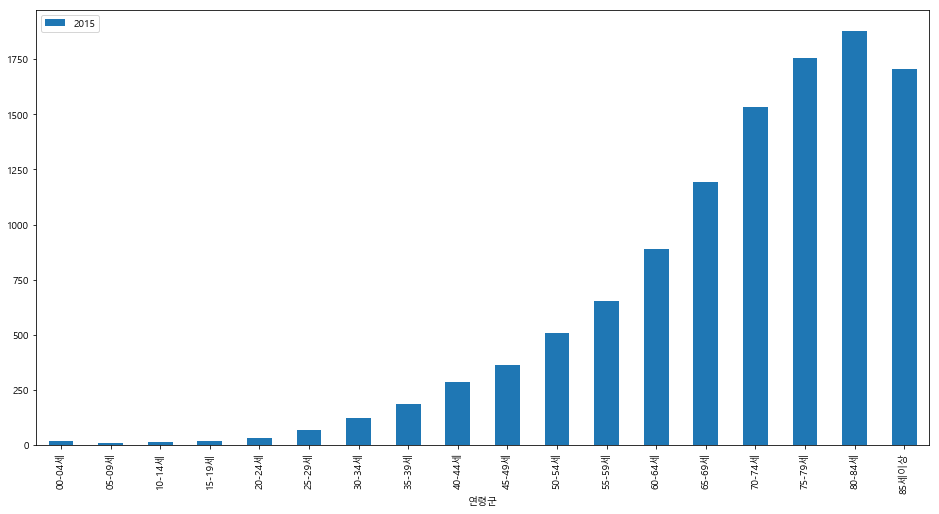

In [13]:
cancer.set_index('연령군').query('암종=="모든암" and 연령군!="전체" and 발생연도==2015 and 성 =="남녀전체"').groupby('발생연도')['발생률(명/10만명)'].plot.bar(figsize=(16,8),legend=1)

발생연도
2015    AxesSubplot(0.125,0.125;0.775x0.755)
Name: 발생률(명/10만명), dtype: object

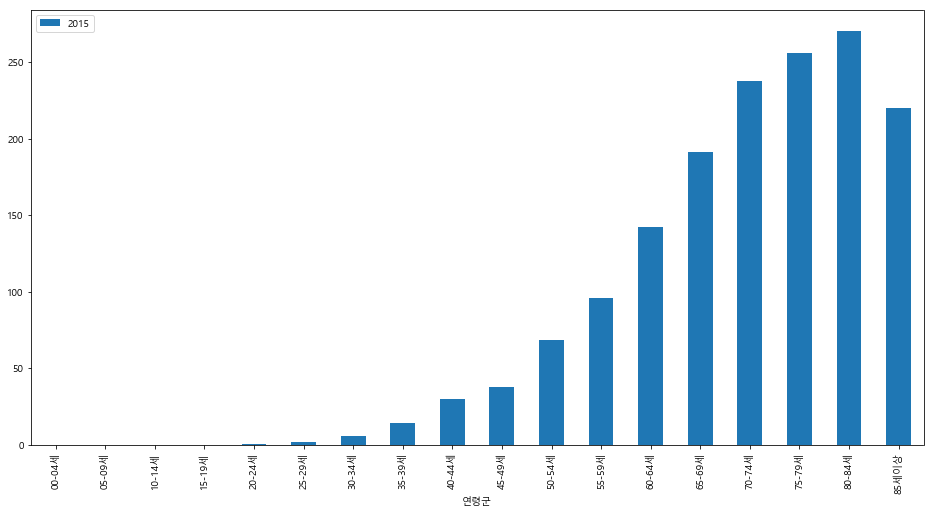

In [14]:
cancer.set_index('연령군').query('암종=="위" and 연령군!="전체" and 발생연도==2015 and 성=="남녀전체"').groupby('발생연도')['발생률(명/10만명)'].plot.bar(figsize=(16,8),legend=1)

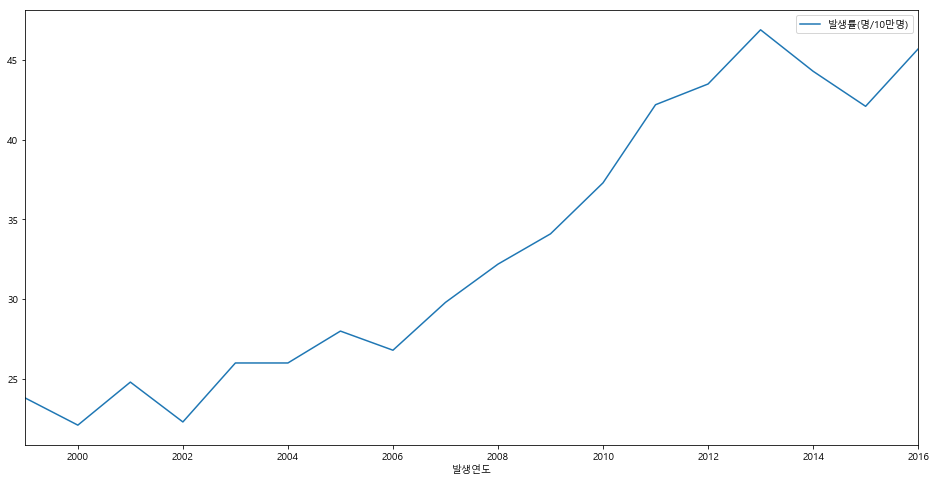

In [15]:
cancer.set_index('발생연도').query('암종=="모든암" and 연령군=="25-29세" and 성=="남자"')['발생률(명/10만명)'].plot(figsize=(16,8),legend=1)

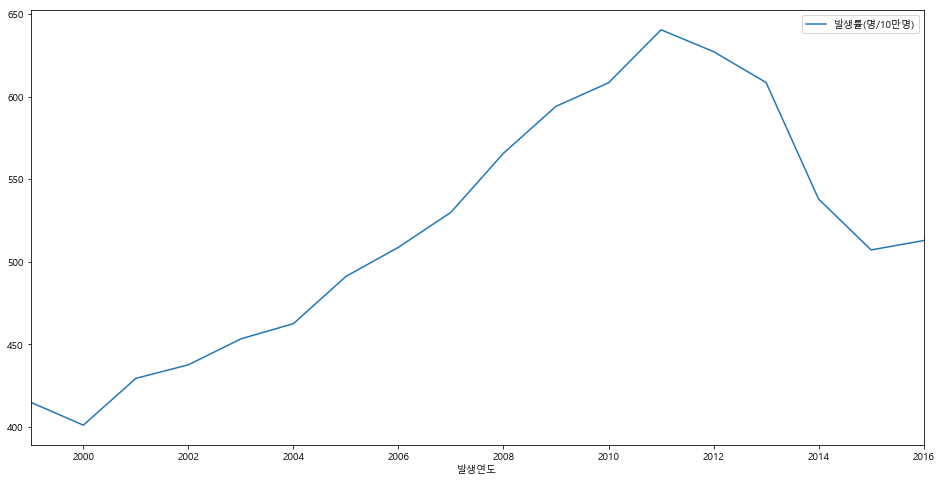

In [47]:
cancer.set_index('발생연도').query('암종=="모든암" and 연령군=="50-54세" and 성=="남녀전체"')['발생률(명/10만명)'].plot(figsize=(16,8),legend=1)

성
남녀전체    AxesSubplot(0.125,0.125;0.775x0.755)
남자      AxesSubplot(0.125,0.125;0.775x0.755)
여자      AxesSubplot(0.125,0.125;0.775x0.755)
Name:  5년 암상대생존율(%), dtype: object

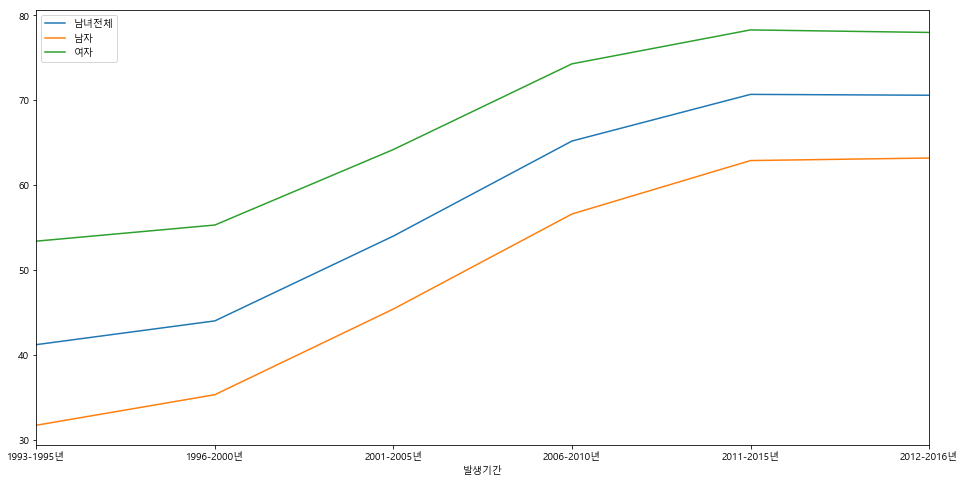

In [17]:
cancer_sur.set_index('발생기간').query('암종=="모든암"').groupby('성')[' 5년 암상대생존율(%)'].plot(figsize=(16,8),legend=1)

In [18]:
insur_cancer.head()

,진료년도,암상병코드,환자수(명),청구건수(건),요양급여비용(원)
0,2013,C00,324,1562,461272590
1,2013,C01,679,6322,2617671820
2,2013,C02,2561,26425,10823034250
3,2013,C03,663,5818,2245432280
4,2013,C04,391,3360,1351679880


In [43]:
test = insur_cancer.groupby('진료년도')['요양급여비용(원)'].sum()/insur_cancer.groupby('진료년도')['환자수(명)'].sum()

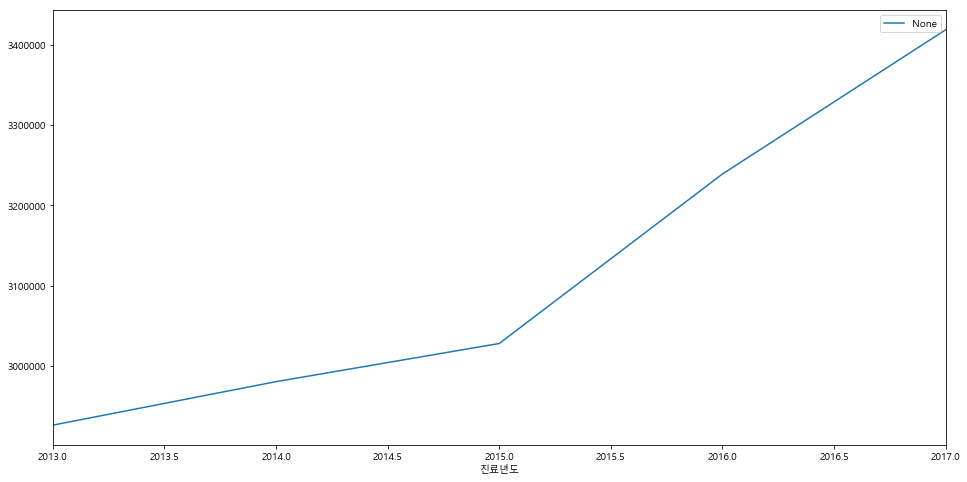

In [46]:
test.plot(figsize=(16,8),legend=1)